In [1]:
from game import Game
import argparse
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
import playercontroller as pc
import agent as ag
import traincontroller as tc
import feature_extractors.extractor_helpers as exh
import gch
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Dense, Dropout
from config import all_features
from training import train_loop
import eval
import parse
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
players = 4
player_controllers = [pc.random_player_controller() for i in range(4)]
train_controller = None
features = all_features
game = Game(players, features, player_controllers, train_controller)

In [30]:
input_size = exh.get_input_size(features, players)
agents = eval.get_agents("models/train0", input_size)
ratings = eval.calibrate_agent_elo(game, agents, eval_epochs=500)

In [31]:
for i in range(len(ratings)):
    iter = int(parse.parse("benchmark_{}_iters.h5", ratings[i][0])[0])
    ratings[i] = (iter, ratings[i][1], ratings[i][2])

In [32]:
iters = []
mus = []
sigmas = []

ratings = sorted(ratings, key=lambda x: x[0])
for x in ratings:
    iters.append(x[0])
    mus.append(x[1])
    sigmas.append(x[2])

Text(0, 0.5, 'trueskill rating')

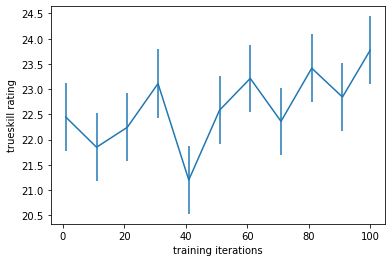

In [34]:
plt.errorbar(iters, mus, yerr=sigmas)
plt.xlabel("training iterations")
plt.ylabel("trueskill rating")